In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pylab as plt 
%matplotlib inline 
from matplotlib.pylab import rcParams
rcParams['figure.figsize']= 10,6

In [2]:
#Import data 
dataset = pd.read_csv('AirPassengers.csv')
#Parse strings to datetime type 
dataset['Month']= pd.to_datetime(dataset['Month'], infer_datetime_format=True)
df=dataset.set_index(['Month'])

In [3]:
#Import datetime supaya yang dilibrary datetime bisa digunakan semuanya 
from datetime import datetime
df.head(5)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


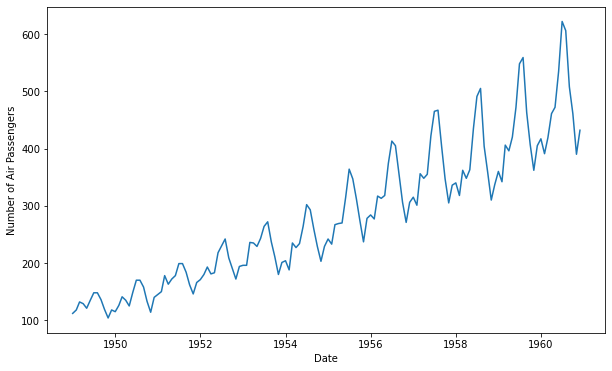

In [5]:
#Plot graph 
plt.xlabel('Date')
plt.ylabel('Number of Air Passengers')
plt.plot(df)
plt.show()

**Plot diatas terdapat trend (T),  sehingga dapat dikatakan bahwa data tidak stasioner**

**Ada dua faktor utama yang membuat deret waktu tidak stasioner, yaitu:**

**• mean tidak konstan**

**• Variasi tidak konstan**

**Untuk lebih meyakinkan, mari kita plot nilai mean dan variansnya**

In [24]:
#menentukan mean dan varians dalam data  
mean= df.rolling(window=12).mean()
std= df.rolling(window=12).std()

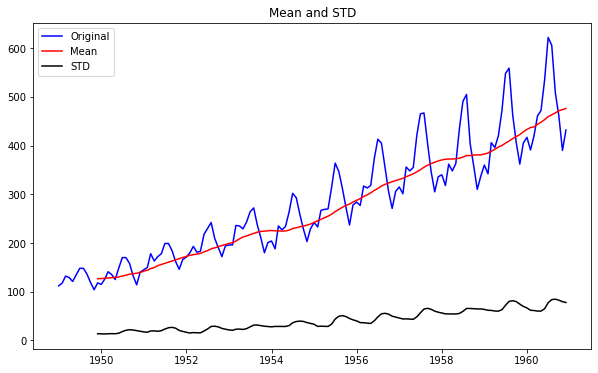

In [7]:
#Plot mean dan varians 
orig = plt.plot(df, color='blue', label='Original')
mean = plt.plot(mean, color='red', label='Mean')
std= plt.plot(std, color='black', label='STD')
plt.legend(loc='best')
plt.title('Mean and STD')
plt.show(block=False)

**Dari plot diatas terlihat untuk mean dan variansnya tidak konstan**, 

Selain mengggunakan plot, dapat juga menggunakan Dickey Fuller untuk menentukan data tersebut stasioner atau tidak. 

Uji unit root (uji akar unit) merupakan uji untuk mengetahui stasioneritas data time series yang sering digunakan.

Uji ini dikembangkan oleh David Dickey dan Wayne Fuller sehingga dikenal dengan sebutan **Augmented Dickey-Fuller Test (ADF Test)**. Uji unit root lain yang juga sering digunakan yaitu Uji Phillips-Perron.

In [9]:
#Perform Dickey Fuller test: untuk menguji data stasioner terhadapat time series 
from statsmodels.tsa.stattools import adfuller

print('Results of Dickey-Fuller Test')
dftest= adfuller(df['#Passengers'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value','#Lags Used','Number of Observation Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key]=value
print(dfoutput)

Results of Dickey-Fuller Test
Test Statistic                  0.815369
p-value                         0.991880
#Lags Used                     13.000000
Number of Observation Used    130.000000
Critical Value (1%)            -3.481682
Critical Value (5%)            -2.884042
Critical Value (10%)           -2.578770
dtype: float64


**Dari nilai p value diatas yaitu 0.999 yaitu lebih besar dari 0.05 sehingga data tidak stasioner**

### Cara menstasioner kan data 

1. Menggunakan differencing (pembedaan)
2. Menggunakan transformasi data 
3. Menggunakan uji akar unit (unit root test) atau ADF

##### Menggunakan differencing (pembedaan)

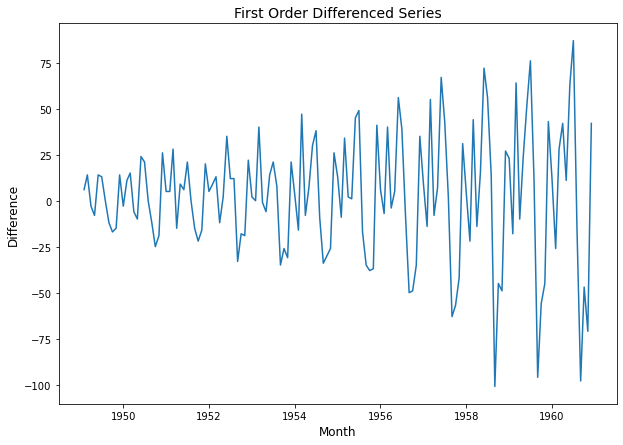

In [13]:
# Change for (t)th day is Close for (t)th day minus Close for (t-1)th day.
df['Difference'] = df['#Passengers'].diff()

# Plot the Change
plt.figure(figsize=(10, 7))
plt.plot(df['Difference'])
plt.title('First Order Differenced Series', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Difference', fontsize=12)
plt.show()

**Ternyata setelah dilakukan differencing , data yang digunakan belum stasioner, sehingga dilakukan 
Transformasi data menggunkan log**

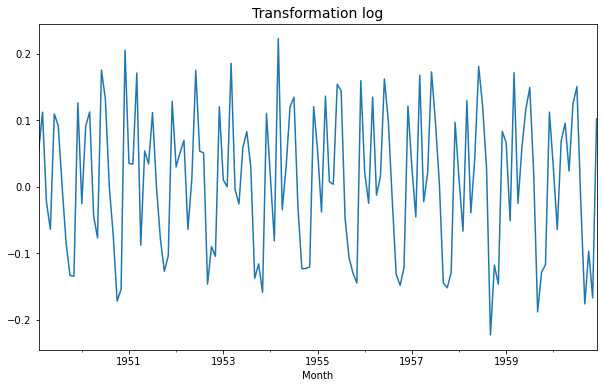

In [16]:
df['#Passengers_log'] = np.log(df['#Passengers'])
df['#Passengers_log_diff'] = df['#Passengers_log'] - df['#Passengers_log'].shift(1)
df['#Passengers_log_diff'].dropna().plot()
plt.title('Transformation log', fontsize=14)
plt.show()

In [17]:
df1=df['#Passengers_log_diff'].dropna()

In [18]:
#Perform Dickey Fuller test: untuk menguji data stasioner terhadapat time series 
from statsmodels.tsa.stattools import adfuller

print('Results of Dickey-Fuller Test')
dftest= adfuller(df1, autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value','#Lags Used','Number of Observation Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key]=value
print(dfoutput)

Results of Dickey-Fuller Test
Test Statistic                 -2.717131
p-value                         0.071121
#Lags Used                     14.000000
Number of Observation Used    128.000000
Critical Value (1%)            -3.482501
Critical Value (5%)            -2.884398
Critical Value (10%)           -2.578960
dtype: float64


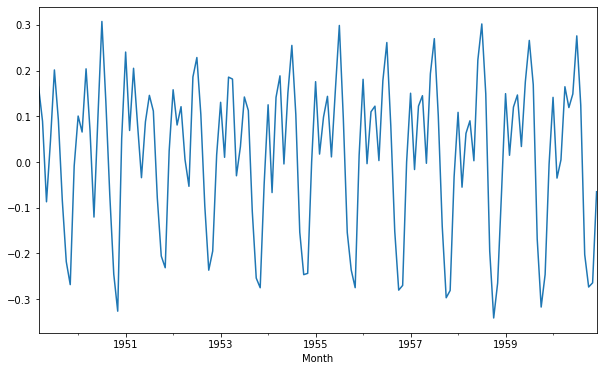

In [21]:
df['#Passengers_log'] = np.log(df['#Passengers'])
df['#Passengers_log_diff'] = df['#Passengers_log'] - df['#Passengers_log'].shift(2)
df['#Passengers_log_diff'].dropna().plot()
plt.show()

In [22]:
df2=df['#Passengers_log_diff'].dropna()

In [23]:
#Perform Dickey Fuller test: untuk menguji data stasioner terhadapat time series 
from statsmodels.tsa.stattools import adfuller

print('Results of Dickey-Fuller Test')
dftest= adfuller(df2, autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value','#Lags Used','Number of Observation Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key]=value
print(dfoutput)

Results of Dickey-Fuller Test
Test Statistic                 -3.167907
p-value                         0.021919
#Lags Used                     11.000000
Number of Observation Used    130.000000
Critical Value (1%)            -3.481682
Critical Value (5%)            -2.884042
Critical Value (10%)           -2.578770
dtype: float64


**Metode Transformation yang dilakukan menghasilkan data yang stasioner dengan melihat nilai p value ADF yang lebih kecil dari 0.05**